In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 27 13:33:15 2023

@author: rdevinen
"""

import pandas as pd
import pickle
    

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

#%%
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go

import sys
sys.path.append("C:/Users/rdevinen/Music/GitHub/palm_paper/")
import os
print(os.getcwd())

from plot_functions import plot_openstreet

plot_openstreet()

c:\Users\rdevinen\Music\GitHub\palm_paper


# Load and Plot measuremet data

In [71]:
def plot_openstreet(t = 16):
    with open('map_scatter_plot_testo_full_310.pickle', 'rb') as handle:
        map_scatter_plot_testo_full = pickle.load(handle)

    dff = map_scatter_plot_testo_full[t].copy()

    fig = px.scatter_mapbox(dff,
                            lon = 'longitude',
                            lat = 'latitude',
                        zoom = 16,
                        color = dff["temp_C"],
                        size = dff["size"],
                        width = 1200,
                        labels = {"temp_C": "Temperature °C"},
                        height = 900,
                            color_continuous_scale='Rainbow',
                        title = "Temperature between {} and {}".format(dff.index[2], dff.index[-15]),
                        range_color = [26,36]
                        )

    fig.update_layout(mapbox_style = "open-street-map")
    #fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
    fig.show()

plot_openstreet()

In [67]:
with open('map_scatter_plot_testo_full_310.pickle', 'rb') as handle:
    map_scatter_plot_testo_full = pickle.load(handle)

dff = map_scatter_plot_testo_full[16].copy()

In [66]:
fig = px.scatter_mapbox(dff,
                        lon = 'longitude',
                        lat = 'latitude',
                       zoom = 16,
                       color = dff["temp_C"],
                       size = dff["size"],
                       width = 1200,
                       labels = {"temp_C": "Temperature °C"},
                       height = 900,
                        color_continuous_scale='Rainbow',
                       title = "Temperature between {} and {}".format(dff.index[2], dff.index[-15]),
                       range_color = [26,36]
                       )

fig.update_layout(mapbox_style = "open-street-map")
#fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

# Plot Measurement data in Matplotlib

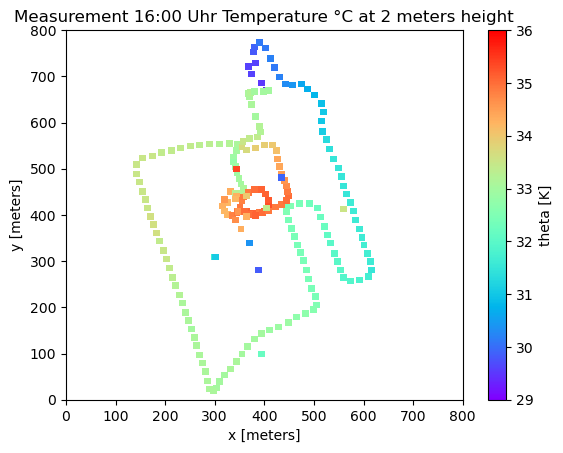

Text(0.5, 1.0, 'title')

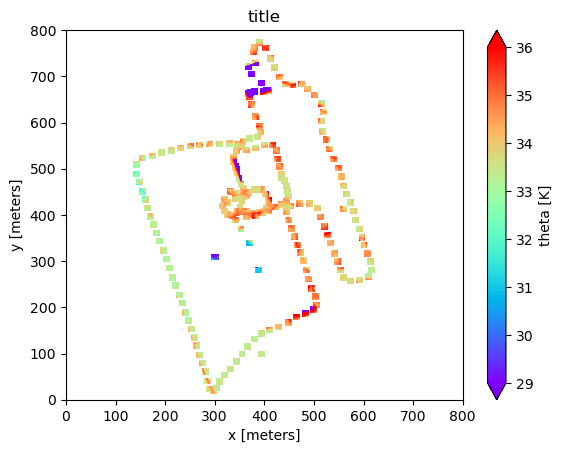

In [62]:

# function to convert lat and lon to simulation coordinates
def convert_lat_lon_to_image_coords(lat, lon, min_lat = 48.45574, 
                                    min_lon = 7.93867, max_lat = 48.46050,
                                    max_lon = 7.94586):
    lat_range = max_lat - min_lat
    lon_range = max_lon - min_lon
    lat_scale_factor = 800 / lat_range
    lon_scale_factor = 800 / lon_range
    scaled_x = (lat - min_lat) * lat_scale_factor
    scaled_y = (lon - min_lon) * lon_scale_factor
    return scaled_x, scaled_y

# since simulation data dont have even coordinates we need this function
def make_odd(number):
    number = round(number)
    if number % 2 == 0:  # Check if the number is even
        return number + 1  # If even, add 1 to make it odd
    else:
        return number  # If already odd, leave it unchanged

# load measurement data
with open('map_scatter_plot_testo_full_310.pickle', 'rb') as handle:
    map_scatter_plot_testo_full = pickle.load(handle)

def plot_meas(t = 16):
    # use empty canvas to plot measurement data
    new = xr.open_dataset(
        "C:/Users/rdevinen/OneDrive/palm transfer/campus_24_v1_3d.000.nc", engine="netcdf4")

    a1 = new["theta"].isel(time=16, zu_3d=2).fillna(0)
    a1.loc[:] = np.nan
    
    dff = map_scatter_plot_testo_full[t].copy()
    dff["x"], dff["y"] = convert_lat_lon_to_image_coords(dff.latitude, dff.longitude)

    
    for index, row in dff.iterrows():
        
        x1 = make_odd(row["x"]) - 6
        x2 = make_odd(row["x"]) + 6

        y1 = make_odd(row["y"]) - 6
        y2 = make_odd(row["y"]) + 6    
        
        
        
        a1.loc[dict(x=slice(y1,y2), y=slice(x1,x2))] = row["temp_C"]

    fig, ax = plt.subplots()
    ax.clear()
    a1.plot(  cmap='rainbow', robust=True, ax = ax, label='Inline label', vmin=29, vmax=36); #new


    ax.set_title("Measurement " + str(t) + ":00 Uhr" + " Temperature °C at 2 meters height")
    #plt.savefig("plots/plot.pdf", format='pdf')
    #plt.savefig('plots/plot.svg', format='svg')
    plt.show()
    



plot_meas(16)
# for i in range(24):
#     plot_meas(i)
####################################################################################################################
new = xr.open_dataset(
        "C:/Users/rdevinen/OneDrive/palm transfer/campus_24_v1_3d.000.nc", engine="netcdf4")

a = new["theta"].isel(time=16, zu_3d=2).fillna(0)
a.loc[:] = np.nan

dff = map_scatter_plot_testo_full[t].copy()
dff["x"], dff["y"] = convert_lat_lon_to_image_coords(dff.latitude, dff.longitude)

t = 16
new = xr.open_dataset(
    "C:/Users/rdevinen/OneDrive/palm transfer/campus_24_v1_3d.000.nc", engine="netcdf4")

a1 = new["theta"].isel(time=t, zu_3d=2).fillna(0)

b1 = new["im_t_indoor_mean"].isel(time=t, zw_3d=2).fillna(0)

c1 = (a1+b1)-273 #new


for index, row in dff.iterrows():
    
    x1 = make_odd(row["x"]) - 6
    x2 = make_odd(row["x"]) + 6

    y1 = make_odd(row["y"]) - 6
    y2 = make_odd(row["y"]) + 6    
    
    
    
    # a.loc[dict(x=slice(y1,y2), y=slice(x1,x2))] = row["temp_C"]
    a.loc[dict(x=slice(y1,y2), y=slice(x1,x2))] = c1.loc[dict(x=slice(y1,y2), y=slice(x1,x2))]



fig5, ax5 = plt.subplots()
a.plot(  cmap='rainbow', robust=True, ax = ax5, label='Inline label', vmin=29, vmax=36); #new
ax5.set_title("title")

# Load Simulation data convert and plot for a single instance

(array([28554., 16940., 19438., 11876., 16056.,  1560.,  2474.,  2870.,
         3906.,  3876.]),
 array([26.63009644, 26.73997879, 26.84985924, 26.95974159, 27.06962204,
        27.17950439, 27.28938675, 27.3992672 , 27.50914955, 27.61903   ,
        27.72891235]),
 <BarContainer object of 10 artists>)

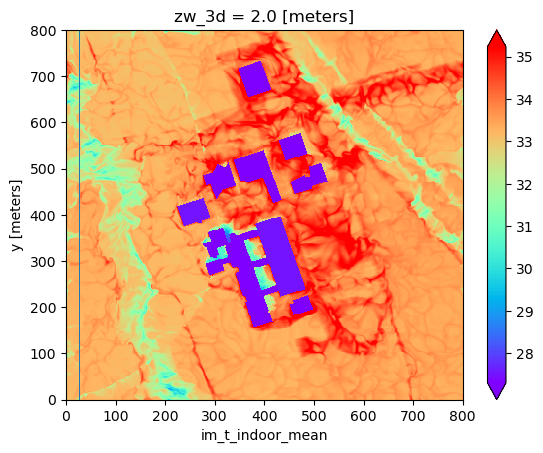

In [40]:
t = 16
new = xr.open_dataset(
    "C:/Users/rdevinen/OneDrive/palm transfer/campus_24_v1_3d.000.nc", engine="netcdf4")

fig1, ax1 = plt.subplots()


a1 = new["theta"].isel(time=t, zu_3d=2).fillna(0)

b1 = new["im_t_indoor_mean"].isel(time=t, zw_3d=2).fillna(0)

c1 = (a1+b1)-273 #new



c1.plot(  cmap='rainbow', robust=True, ax = ax1, label='Inline label'); #new
ax1.set_title("24 Hours Simulation " + str(t) + ":00 Uhr" + " Temperature °C at 2 meters height")
# fig1.savefig("New Simulation " + str(t) + ":00 Uhr.png")

###############################################################################
b1 = new["im_t_indoor_mean"].sel( zw_3d=2, method='nearest') - 273.15

b1.plot()
    

# Replace a value in Netcdf and plot as proof

In [ ]:
c1.loc[:] = 31

c1.loc[dict(x = slice(143,150), y = slice(463, 470))] = 33

In [ ]:
fig2, ax2 = plt.subplots()
c1.plot(  cmap='rainbow', robust=True, ax = ax2, label='Inline label'); #new
ax2.set_title("24 Hours Simulation " + str(t) + ":00 Uhr" + " Temperature °C at 2 meters height")

# Load Netcdf and make iteration of plots

In [ ]:
ds = xr.open_dataset(
    "D:/HS_Offenburg/PALM/campus_72_v1/OUTPUT/campus_72_v1_3d.000.nc", engine="netcdf4") 

a1 = new["theta"].isel( zu_3d=2).fillna(0)

b1 = new["im_t_indoor_mean"].isel( zw_3d=2).fillna(0)

c1 = (a1+b1)-273 #new

In [ ]:
facetted_data = c1.groupby('time')
facetted_data

In [ ]:
import xarray as xr

# Open a NetCDF dataset
ds = xr.open_dataset(
    "D:/HS_Offenburg/PALM/campus_72_v1/OUTPUT/campus_72_v1_3d.000.nc", engine="netcdf4") 

a1 = ds["theta"].isel( zu_3d=2).fillna(0)

b1 = ds["im_t_indoor_mean"].isel( zw_3d=2).fillna(0)

c1 = (a1+b1)-273 #new
# Group by the 'time' dimension
grouped_data = c1.groupby('time')

# Access the groups dictionary
groups_dict = grouped_data.groups

In [ ]:
def plot_facet(facet_data, ax):
    facet_data.plot(cmap='rainbow', robust=True, ax = ax, label='Inline label')

In [ ]:
fig, axes = plt.subplots(nrows=len(grouped_data),  figsize=(10,650))

for i, (month, facet_data) in enumerate(grouped_data):
   plot_facet(facet_data, axes[i])